<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/extras/04.01-Marlin-Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reproducing Figure 5.1 (Marlin, Chapter 5)

# Defining the transfer functions denominators
names = ['First order', 'Second order', 'Underdamped', 'Dead time', 'Integrator']
fo = [1, 1]    # First order system
so = [1, 2, 1] # Second order system
ud = [1, 1, 1] # Underdamped (second order)
dt = [0, 1]    # Dead time (as Pade approximation)
rp = [1, 0]    # Integrator (ramp)

# Generating the outputs
tinf = 12.5
td = 2.5
time = linspace(0, tinf, 101)
out_step = []
for sys in [fo, so, ud, dt, rp]:
  out, _ = step(tf(1, sys), time)
  out_step.append([time, out])
imp_step = []
for sys in [fo, so, ud, dt, rp]:
  out, _ = impulse(tf(1, sys), time)
  imp_step.append([time, out])

# Plotting
plt.close('all')
fig_width_cm = 48
fig_height_cm = 18
plt.figure(1, figsize =(fig_width_cm /2.54, fig_height_cm /2.54))

for k, out in enumerate(out_step):
  plt.subplot(2, 5, k+1)
  if k+1==4:
    plt.plot(out[0]+2*td, out[1], 'blue')
  else:
    plt.plot(out[0]+td, out[1], 'blue')
  plt.grid()
  plt.xlim([0, tinf+td])
  plt.ylim([0, 1.2])
  plt.title(names[k])
  if k+1 == 1:
    plt.ylabel('Output for $u(t-2.5)$')

for k, out in enumerate(imp_step):
  plt.subplot(2, 5, k+6)
  if k+6==9:
    plt.plot(out[0]+2*td, out[1], 'green')
  else:
    plt.plot(out[0]+td, out[1], 'green')
  plt.grid()
  plt.xlabel('Time')
  plt.xlim([0, tinf+td])
  plt.ylim([-0.2, 1.2])
  if k+1 == 1:
    plt.ylabel('Output for $\delta(t-2.5)$')

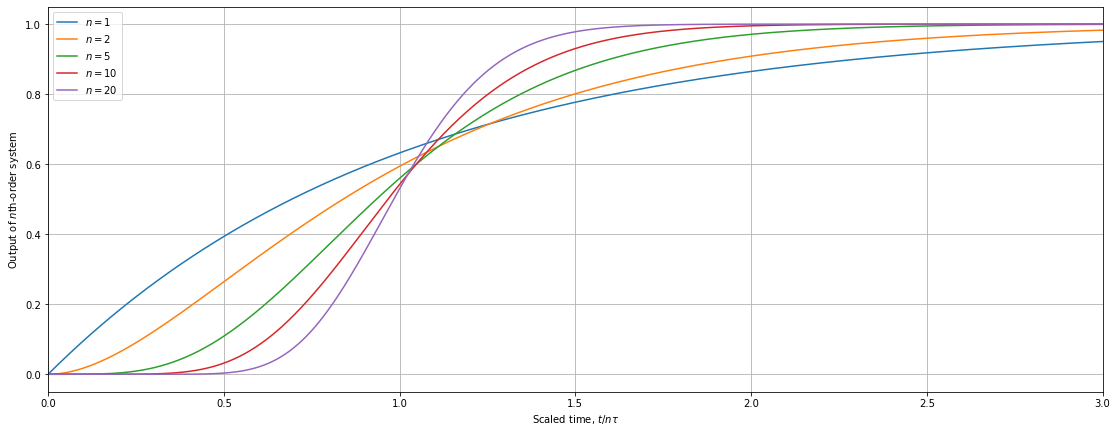

In [80]:
# Reproducing Figure 5.5 (Marlin, Chapter 5)

# Generating the outputs
ns = [1, 2, 5, 10, 20]
tau = 1
tinf = 3*tau
out_step = []
for n in ns:
  time = linspace(0, tinf*n, 1001)
  sys = tf(1, [tau, 1])**n
  out, _ = step(sys, time)
  out_step.append([time, out])

# Plotting
plt.close('all')
fig_width_cm = 48
fig_height_cm = 18
plt.figure(1, figsize =(fig_width_cm /2.54, fig_height_cm /2.54))

for k, out in enumerate(out_step):
  plt.plot(out[0]/(ns[k]*tau), out[1])

plt.grid()
plt.xlim([0, tinf])
plt.xlabel('Scaled time, $t/ {n \\tau}$')
plt.ylabel('Output of $n$th-order system')
plt.legend(labels=['$n={}$'.format(n) for n in ns])